# RQt 개발 환경
RQt 개발 환경은 운영체제는 Ubuntu Focal (20.04) 또는 Linux Mint 20.x 기준으로 ROS 버전은 ROS 2 Foxy Fitzroy 이다. RQt의 개발 환경은 Qt 5.12.x 이상이며 RQt의 GUI 편집툴로 사용되는 Qt 용 IDE는 Qt Creator 4.5.x 이상을 이용하면 된다. Qt Creator(qtcreator)는 'Installing ROS 2 via Debian Packages'에서 기본으로 설치하는 'ros-foxy-desktop'을 설치하였다면 이미 설치되어 있을 것이다. 만약 설치가 안되어 있다면 하기 명령어로 설치

In [ ]:
sudo apt install qtcreator

# RQt 플러그인 작성 순서
1)번에서 언급한 RQt 플러그인 패키지 생성 방법은 일반적인 패키지 생성과 다르지 않지만 RQt 플러그인 형태로 개발하는 것이기에 RQt 플러그인의 기본 기능 관련과 GUI 관련 패키지는 의존성 패키지로 포함시켜주자. 그리고 한가지 특이한 설정으로는 이 패키지는 Python 언어로 작성하지만 RQt 플러그인의 일부로 작성될 예정이기에 빌드 형태를 'ament_cmake'으로 해줘야한다는 것
그 이외에 다양한 설정 파일 및 소스 파일은 하기 2)~8)번과 같이 작성하면 되는데 이는 어느 정도 RQt 플러그인을 이해할 필요가 있기에 이 강좌에서 준비한 튜토리얼 예제인 rqt_example 패키지를 기준으로 설명하기로 하고 하기 작성 순서는 하나의 예로 설명한 것이기에 따라할 필요는 없고 RQt 플러그인의 개발 순서가 하기와 같이 이루어진다는 것만 알아두도록 하자

1) RQt 플러그인 패키지 생성

In [ ]:
cd ~/robot_ws/src
ros2 pkg create my_first_rqt_plugin_pkg --build-type ament_cmake --dependencies rclpy rqt_gui rqt_gui_py python_qt_binding

2)  패키지 설정 파일 수정

In [ ]:
my_first_rqt_plugin_pkg/package.xml

3) 플러그인 파일 생성

In [ ]:
my_first_rqt_plugin_pkg/plugin.xml

4) 빌드 설정 파일 수정

In [ ]:
my_first_rqt_plugin_pkg/CMakeLists.txt

5) 스크립트 폴더 및 파일 생성

In [ ]:
my_first_rqt_plugin_pkg/scripts/my_first_rqt_plugin_pkg

6) 리소스 폴더 및 UI 파일 생성

In [ ]:
my_first_rqt_plugin_pkg/resource/my_first_rqt_plugin_pkg.ui

7) 소스 폴더 및 파일 생성

In [ ]:
my_first_rqt_plugin_pkg/src/my_first_rqt_plugin_pkg/__init__.py
my_first_rqt_plugin_pkg/src/my_first_rqt_plugin_pkg/examples.py
my_first_rqt_plugin_pkg/src/my_first_rqt_plugin_pkg/examples_widget.py
my_first_rqt_plugin_pkg/src/my_first_rqt_plugin_pkg/examples_xxxxxxx.py

8) 런치 폴더 및 런치 파일 생성

In [ ]:
my_first_rqt_plugin_pkg/launch/rqt_plugin.launch.py

# RQt 예제의 구성

이 강좌에서 RQt 예제(RQt Plugin)로 다룰 것은 하기 그림와 같은 GUI 예제로 RQt의 기본 GUI 기능을 익힐 수 있도록 푸시 버튼(push button), 라디오 버튼(radio button), 슬라이더(slider), 다이얼(dial), LCD 숫자(lcd_number), 라벨(label) 등의 GUI 위젯을 사용하고 ROS 2의 토픽 퍼블리셔와 서브스크라이버, 서비스 서버와 클라이언트를 함께 사용해볼 수 있는 예제로 구성하였다.

image.png

이 강좌에서 참고할 rqt_example 패키지의 파일 구조는 아래와 같다. 이는 GUI 개발에 있어서 가장 기본적인 구성을 담아보았으며 examples.py이 RQt 플러그인 코드이며 여기서 examples_widget.py의 ExamplesWidget 클래스를 호출하게 된다.

rqt_example.ui는 ExamplesWidget에서 UI에 해당되게 된다. 원래 GUI개발은 MVC(Model, View, Controller) 패턴을 많이 사용하는데 하기 구조를 더 확장한다면 examples_widget.py에서 View를 담당하게 하고 examples_data.py과 examples_controller.py를 만들어 토픽 중심으로 이루어지는 data 처리 및 서비스/액션 등으로 구성된 제어단을 별도로 구성하는게 일반적이다. 단, 여기서는 심플한 튜토리얼 성격을 띄고 있기에 간단히 하나의 파일에서 이를 모두 처리하고 있다.

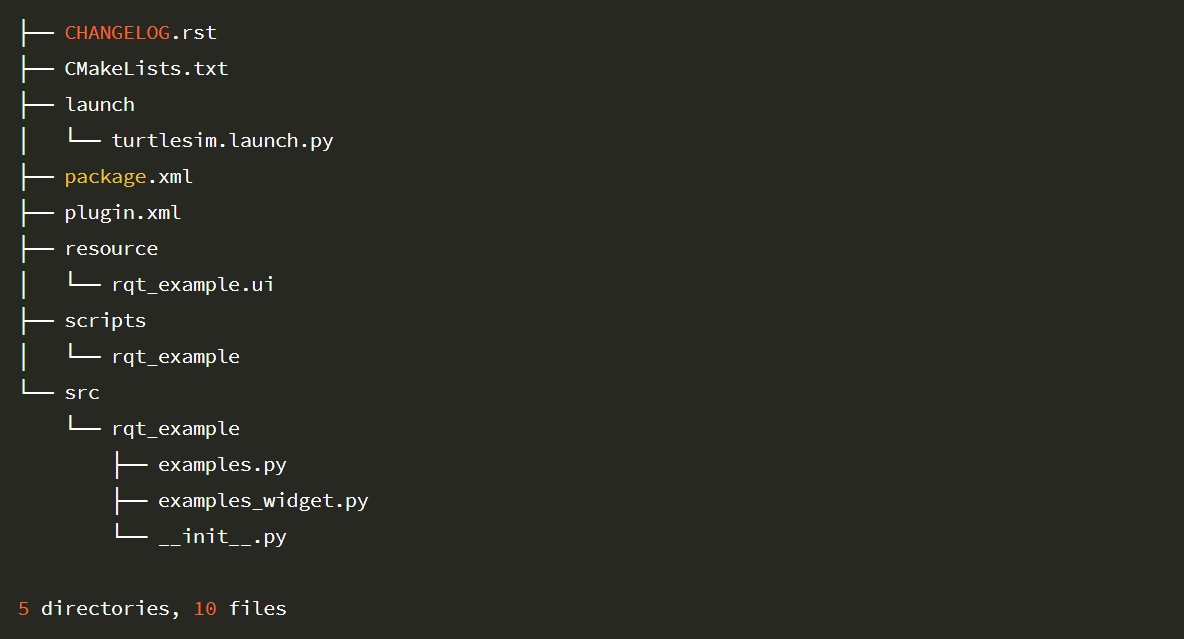

# RQt 예제 UI 살펴보기

qtcreator가 설치되어 있다면 하기와 같이 1) 터미널 창에서 qtcreator를 실행하면서 rqt_example.ui를 불러올 수도 있고, 2) 탐색창에서 rqt_example.ui가 있는 폴더로 이동 후에 아이콘을 클릭하는 것으로 그림과 같이 rqt_example.ui를 불러올 수도 있다. 1), 2)번 중 한가지만 사용하면 된다.

In [ ]:
qtcreator ~/robot_ws/src/ros2-seminar-examples/rqt_example/resource/rqt_example.ui

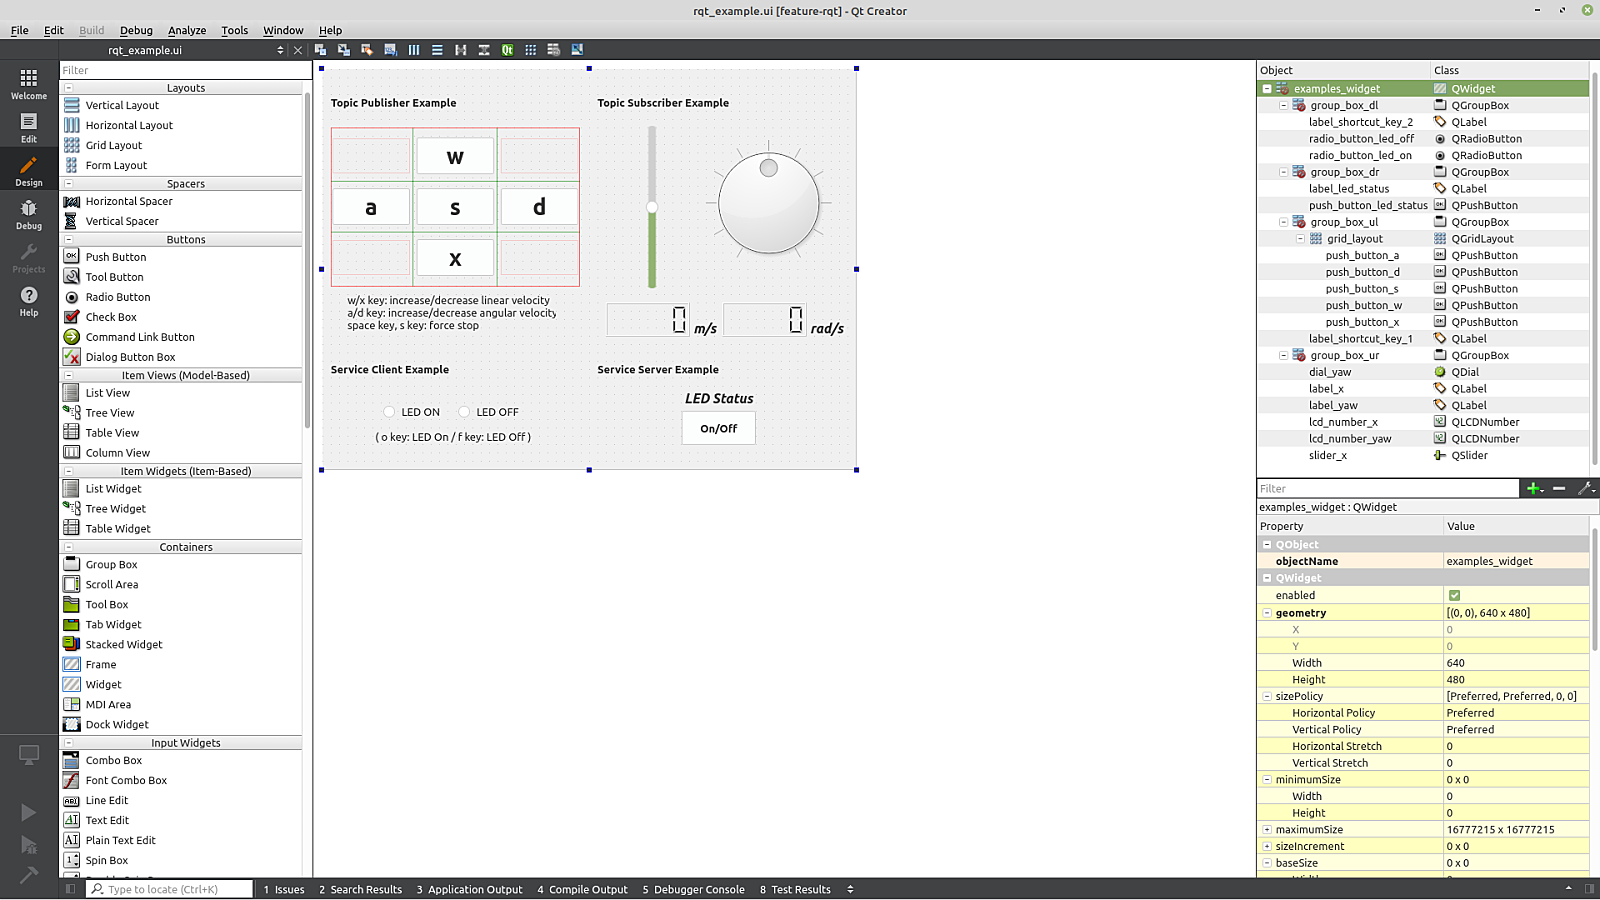

ui 파일은 GUI의 푸시 버튼(push button), 라디오 버튼(radio button), 슬라이더(slider), 다이얼(dial), LCD 숫자(lcd_number), 라벨(label) 등의 Qt GUI 위젯을 마우스 클릭과 이름 입력만으로 GUI 구성을 할 수 있는 것으로 이 강좌에서 제공하는 예제 파일을 보고 어떤 식으로 구성되었는지 알아보면 좋을 듯 싶다.

각 UI 위젯의 설명은 ROS 프로그래밍이 아닌 Qt 내용이기에 여기서 다 설명하기 보다는 참고자료의 강좌 링크를 참고하도록 하자. 처음부터 모든 UI의 기능을 알기보다는 위에서 언급한 위젯 중심으로 우선 보기를 추천한다. 그리고 필요시 위에서 언급한 강좌들의 각 위젯의 예제를 보고 ui에 추가하여 사용하면 된다.

# RQt 예제 설정 파일 살펴보기

1) RQt 플러그인 패키지 생성

RQt 플러그인 패키지를 처음부터 생성할 수도 있겠지만 이 강좌에서는 미리 작성해둔 예제 패키지를 다운받아 각 설정 파일 및 소스 코드류를 분석해 볼 예정이다. 이 예제는 하기 리포지토리에 위치해있으며 하기 명령어와 같이 소스 코드를 git clone하여 다운로드 한 후 colcon build 명령어로 빌드하여 사용할 수 있다.

In [ ]:
cs
git clone https://github.com/robotpilot/ros2-seminar-examples.git
cw
cbp rqt_example

2) 패키지 설정 파일 수정

패키지 설정 파일(package.xml)에는 일반적인 ROS 2 패키지와 마찬가지로 패키지 이름, 버전, 설명, 관리자, 라이선스, 저자, 빌드 툴 의존 관계, 의존성 패키지 등을 기술한다. 일반적인 ROS 2 패키지와 다른점은 <export> 태그에 RQt 플러그인 파일(plugin.xml)을 추가하는 것으로 이는 RQt에 이 패키지에서 제공하려는 플러그인을 추가하는 기능이다.

rqt_example/package.xml

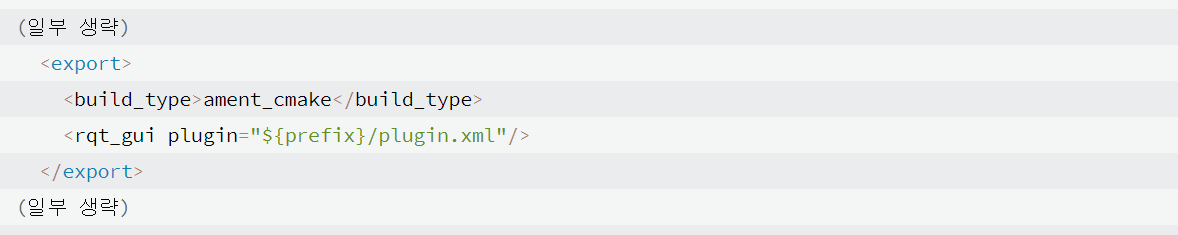

3) RQt 플러그인 파일 생성

터미널창에서 rqt라고 입력하여 RQt를 실행하면 RQt 디폴트 화면이 뜨는데 메뉴 중에서 Plugins > Actions, Configuration, Introspection 등의 세부 항목이 있고 그 안에 실제 실행 가능한 RQt 플러그인이 위치해 있어서 각 RQt 플러그인을 마우스 클릭만으로 실행 시킬 수 있게 되어 있다.

In [ ]:
rqt

우리가 작성할 rqt_example RQt 플러그인 또한 그림 [4]처럼 RQt 디폴트 화면의 Plugins 메뉴에 포함시키고 실행도 시킬 수 있는데 이를 위해서는 RQt 플러그인 파일 (plugin.xml)을 생성하고 다음과 같이 알맞은 태크를 적어줘야 한다. 다음 내용을 참고하기 바라며 <group> 태그가 메뉴의 세부 항목 그룹이 되고 <label>, <icon>, <statustip>이 해당 RQt 플러그인의 속성이 된다.

rqt_example/plugin.xml

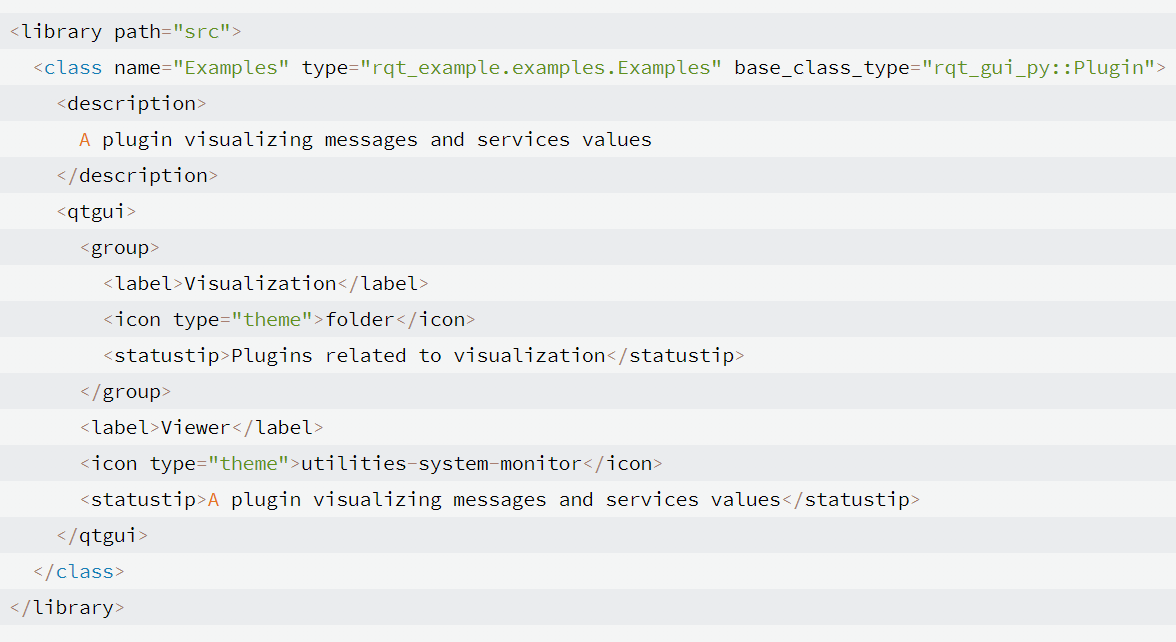

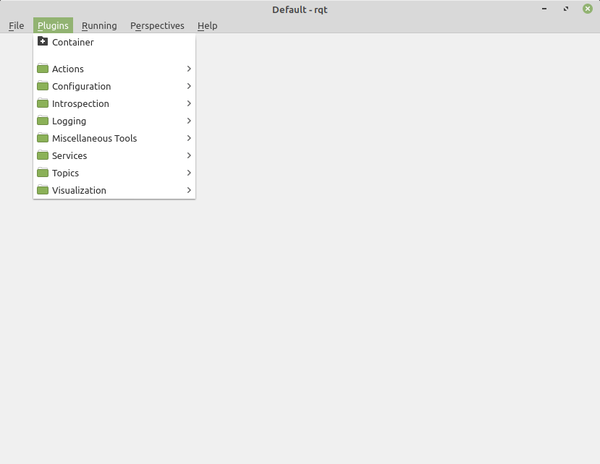

4) 빌드 설정 파일 수정

빌드 설정 파일(CMakeLists.txt)도 여느 일반적인 빌드 설정과 다를게 없는데 C++ 코드와 같이 빌드하여 실행 파일을 만드는 설정은 없고 하기와 같이 plugin.xml 파일과 resource, launch 폴더 및 하위 파일들을 share 폴더에 설치하고 scripts 폴더의 rqt_example 파일을 lib 폴더에 설치하는 부분이 있다는 것만 기억하면 된다.

rqt_example/CMakeLists.txt

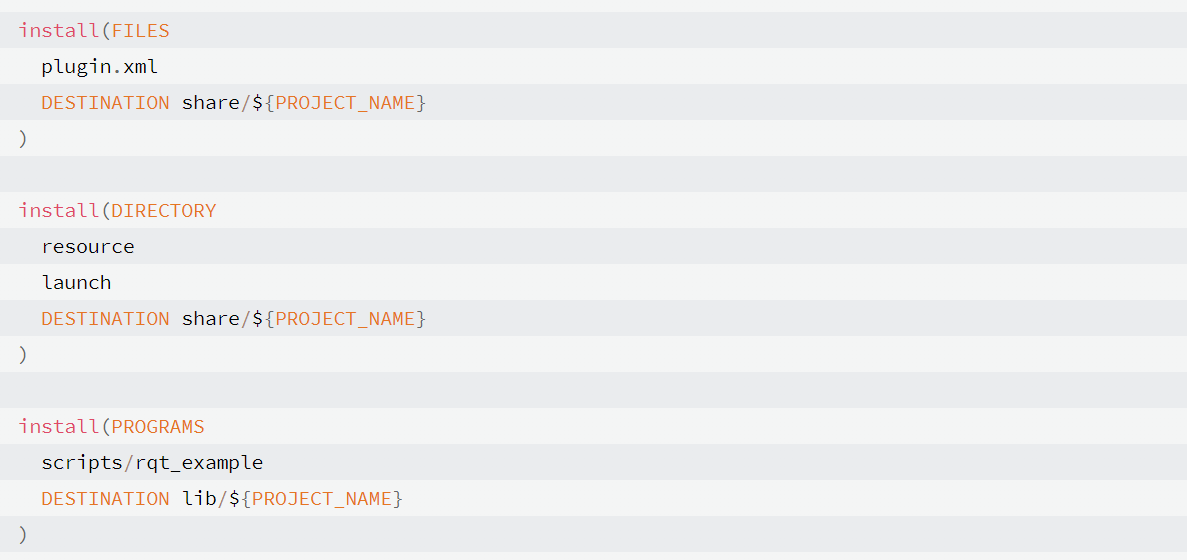

5) 스크립트 폴더 및 파일 생성

스크립트 폴더에는 실행할 RQt 플러그인을 지정하고 종료하는 코드를 하기와 같이 기술하면 된다. 이 스크립트 파일이 RQt의 진입코드라고도 볼 수 있으며 rqt_gui의 main모듈의 Main 클래스를 이용하여 RQt의 플러그인 기능을 사용할 수 있게 되고, 우리가 작성한 메인 코드인 rqt_example의 examples 모듈의 Examples 클래스를 호출하게 된다.

rqt_example/scripts/rqt_example

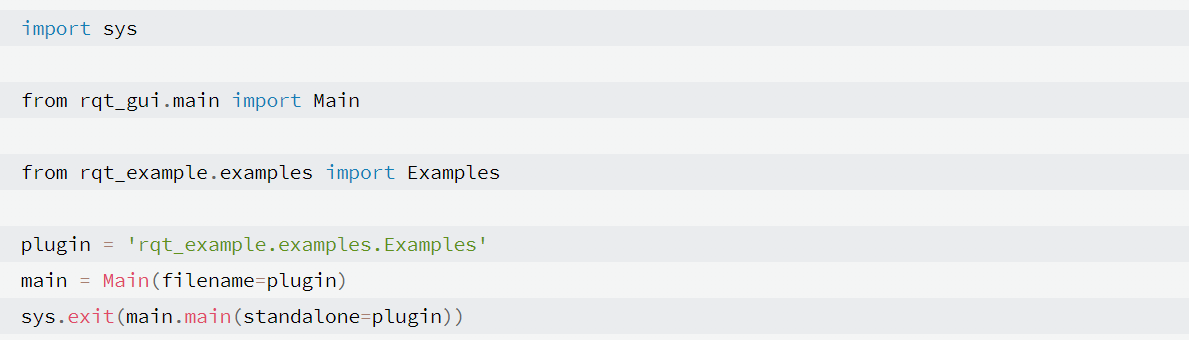

6) 리소스 폴더 및 UI 파일 생성

Qt에 ui 파일은 '6. RQt 예제 UI 살펴보기'에서 살펴보았던 GUI 화면을 구성하는 내용을 담은 파일로 하기와 같이 XML 태그를 이용하고 있다. 이를 수작업으로 작업하지는 않고 앞서 설명한 것과 같이 qtcreator에서 손쉽게 구성할 수 있다.

rqt_example/resource/rqt_example.ui

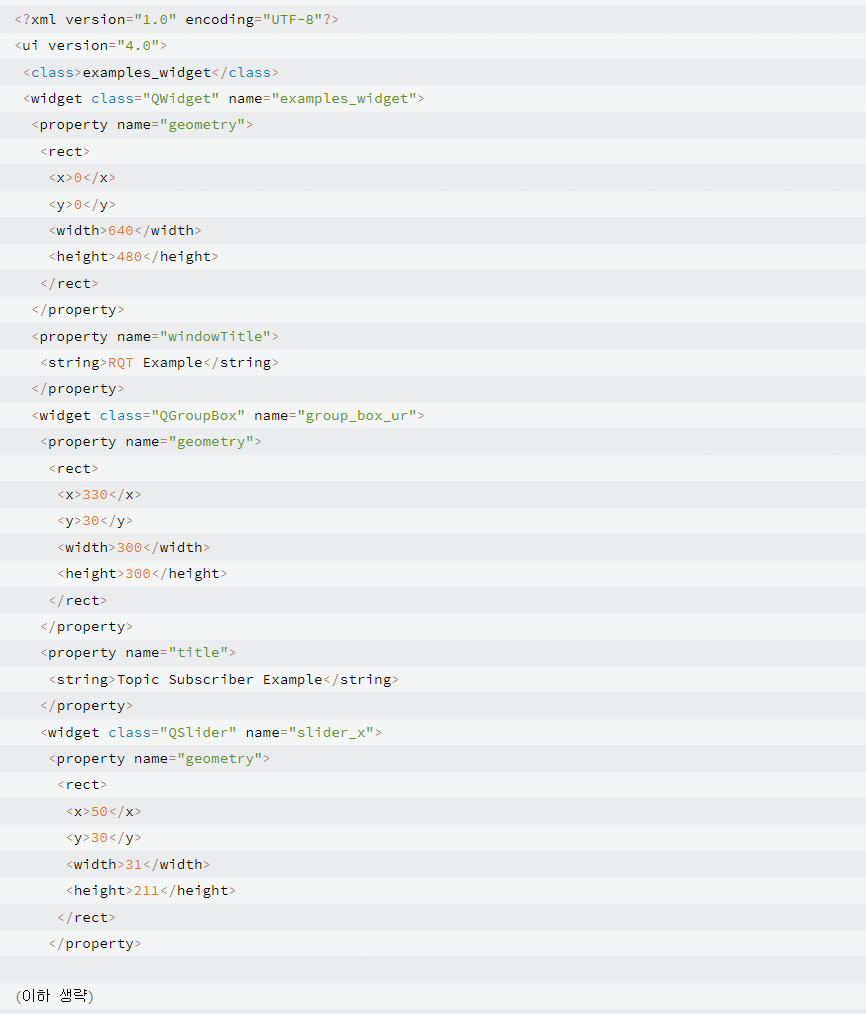

7) 소스 폴더 및 파일 생성

이 예제의 메인 소스 코드에 해당되는 파일들이다. 이는 내용이 상당히 방대하기에 '8. RQt 예제 소스 코드 살펴보기'에서 자세히 설명하도록 하겠다.

rqt_example/src/rqt_example/__init__.py

rqt_example/src/rqt_example/examples.py

rqt_example/src/rqt_example/examples_widget.py

8) 런치 폴더 및 런치 파일 생성

이 런치 파일은 이 강좌에서 다룬 rqt_example 예제를 turtlesim 패키지의 turtlesim_node 노드와 함께 실행하여 연동해보는 테스트를 위해 작성한 파일이다. 참고로 turtlesim_node 노드의 토픽과 맞추기 위해 namespace를 'turtle1'으로 설정하여 rqt_example 노드를 실행하도록 하였다.

rqt_example/launch/turtlesim.launch.py

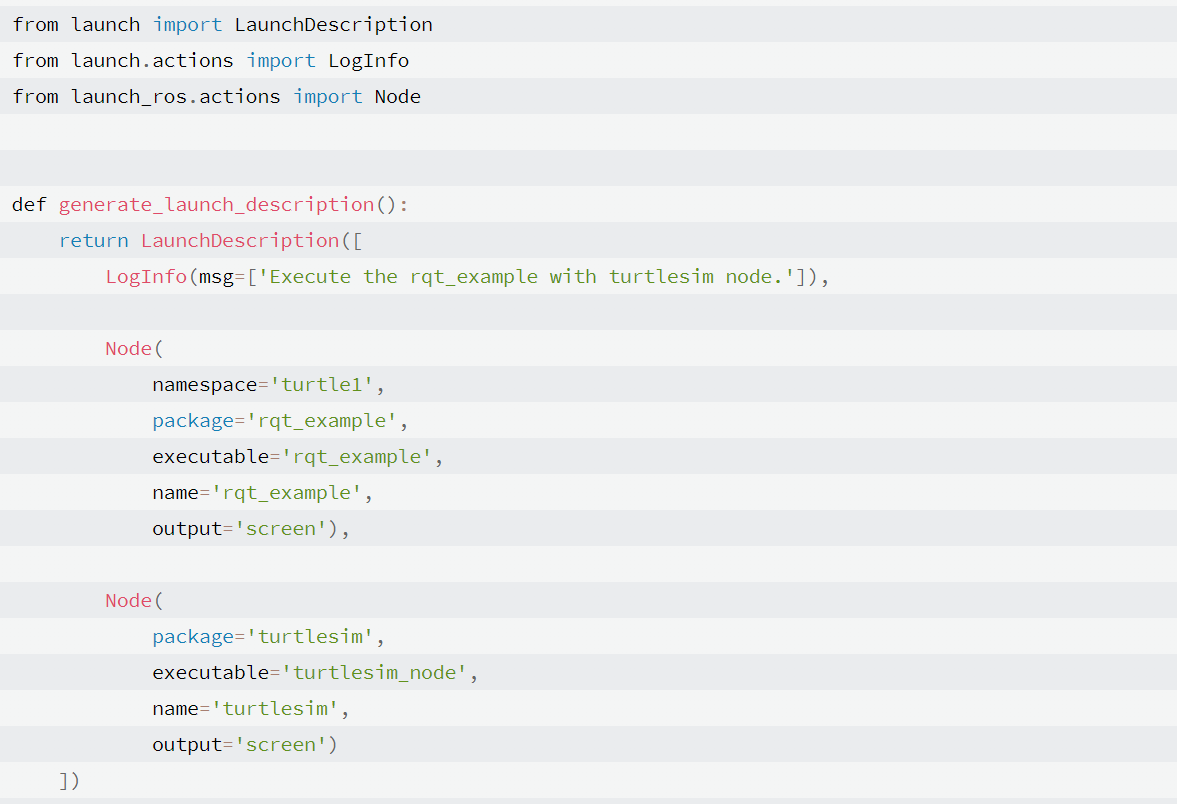

# RQt 예제 소스 코드 살펴보기

예제 소스 코드로는 examples.py와 examples_widget.py 이다. 앞서 설명한 것과 같이 examples.py이 RQt 플러그인 코드이며 이 코드에서 다시 examples_widget.py의 ExamplesWidget 클래스를 호출하게 된다. 각 코드의 전체 소스를 훑어 보고 중요한 코드 중심으로 하나씩 코드를 해석해보자.

rqt_example/src/rqt_example/examples.py

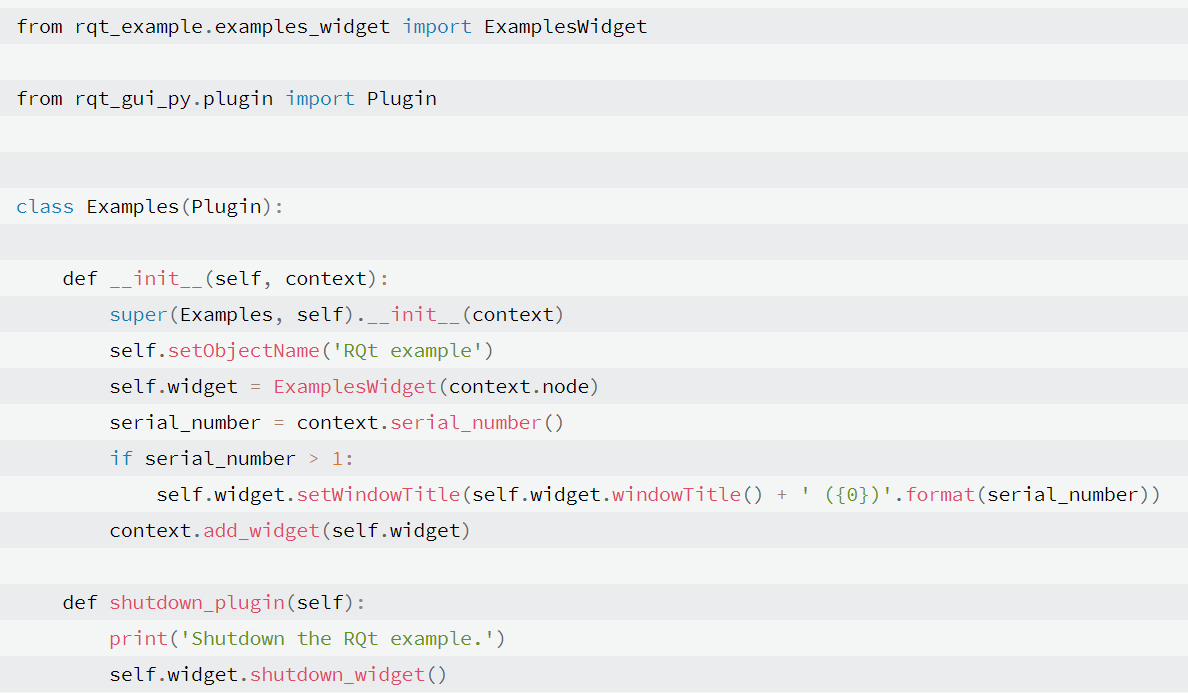

아래와 같이 Examples 클래스는 rqt_gui_py.plugin 모듈의 Plugin 클래스를 Python plugins의 인터페이스로 상속하고 qt_gui.plugin 모듈의 Plugin을 상속한다. 그 뒤 python_qt_binding.QtCore 모듈의 QObject 클래스를 상속함으로써 Qt 기반의 ROS GUI 기능을 프로그래밍할 수 있게 된다.

우선 Examples 클래스의 생성자부터 살펴보자. '__init__()' 메소드의 생성자 구문에서 context가 있는데 이는 PluginContext로 이 RQt 플러그인을 위젯 형태로 RQt 본체와 함께 도킹되어 사용될 수 있게도 해주고 RQt 플러그인의 옵션 설정, 함수 호출, 이벤트 처리 등을 수행하는 후크(hook) 역할도 하게 된다. 더 자세한 내용이 궁금하다면 PluginContext 관련한 하기의 qt_gui 모듈의 Main 및 Plugin 류의 클래스를 참고하는 것을 추천한다.

/opt/ros/foxy/lib/python3.6/site-packages/qt_gui/main.py

/opt/ros/foxy/lib/python3.6/site-packages/qt_gui/plugin.py

/opt/ros/foxy/lib/python3.6/site-packages/qt_gui/plugin_context.py

/opt/ros/foxy/lib/python3.6/site-packages/qt_gui/plugin_handler.py

https://github.com/ros-visualization/qt_gui_core/tree/foxy-devel

그 이외의 내용은 간단히 설명한다. setObjectName 함수는 QObject 계열인 경우 지정하는 오브젝트 이름이다. ExamplesWidget 클래스는 우리가 작성하려고 하는 UI를 포함한 실질적인 코드가 담긴 클래스로 인자로 context.node를 사용하며 이것이 ExamplesWidget 클래스내에서 rclpy의 Node 역할을 하게된다.

이렇게 생성된 widget은 맨 마지막에 context의 add_widget() 함수로 RQt의 위젯으로 추가된다. serial_number은 context 생성시 현재 사용되지 않는 첫 번째 양의 정수를 의미하며 복수의 RQt 플러그인을 구별할 때 사용되는 ID 같은 번호를 말한다. 이를 지정 윈도우의 타이틀로 지정하는 구문이 포함되어있다.

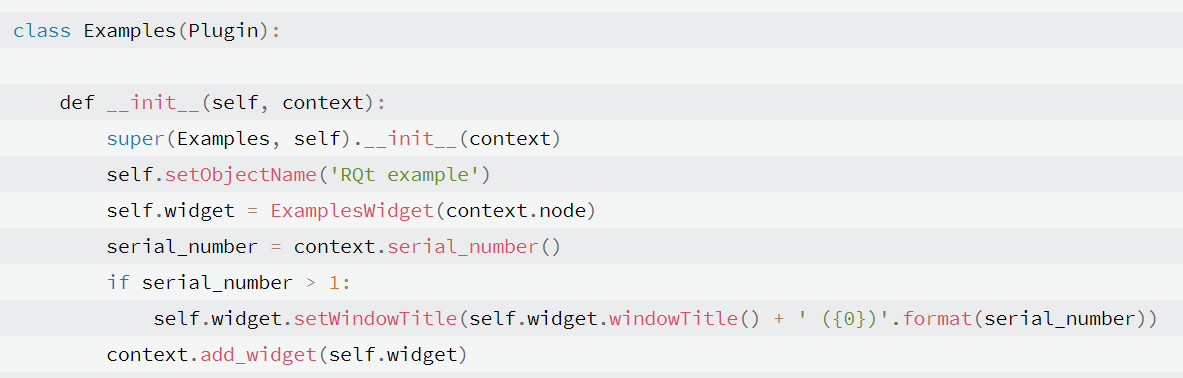

shutdown_plugin 함수는 rqt_example 노드를 실행한 터미널창에서 ctrl + c  명령어 등으로 SIGINT 신호를 받을 때나 UI 화면에서 'x'버튼을 눌러 종료하였을 때 호출되는 함수로 실질적인 코드는 ExamplesWidget 클래스의 shutdown_widget 함수이다. 이는 이어지는 설명에서 자세히 다룰 예정이니 종료시에 호출된다고만 알고 넘어가도록 하자.

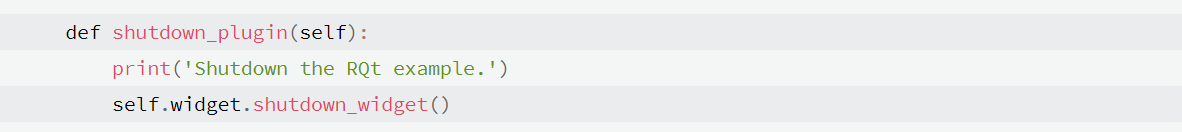

다음의 ExamplesWidget 클래스는 앞서 설명한 GUI 화면 구성을 담당하는 rqt_example.ui 파일을 호출하여 화면에 띄우고, 예제에서 사용할 topic publisher, topic subscriber, service server, service client의 선언, 특정 콜백 함수를 정기적으로 실행시킬 timer류의 선언, push button이나 radio button을 클릭했을 때의 이벤트 함수 실행, slider나 lcd number 류의 인디케이터의 표시를 수행하는 내용들이 담겨있다. 모든 코드를 다 설명할 수는 없겠지만 중요한 코드 중심으로 하나씩 살펴보도록 하자.

rqt_example/src/rqt_example/examples_widget.py
(원 코드 참고)

다음 코드에서는 ament_index_python.resources 모듈의 get_resource 함수를 이용하여 'rqt_example' 패키지의 'rqt_example.ui' 파일을 loadUi 함수를 이용하여 불러오고 있다. 이를 통해 우리는 qtcreator를 통해 미리 만들어둔 UI을 화면에 띄울 수 있게 된다.

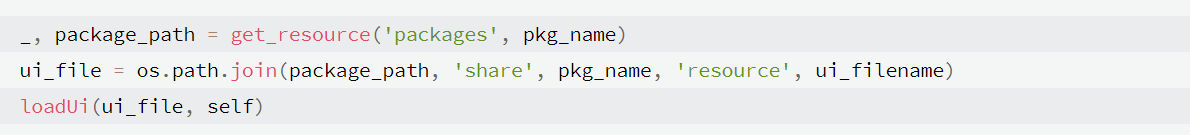

다음 코드에서는 예제에서 사용할 topic publisher, topic subscriber, service_server, service_client의 선언하는 구문이다. create_publisher, create_subscription, create_service, create_client 함수의 사용 방법은 이전 강의에서 다루었기 때문에 이제는 친숙한 함수로 느껴질 것이다. RQt 플러그인 코드에서도 이들의 사용법은 동일한데 토픽을 퍼블리시하는 값은 UI들을 어떻게 조작하였느냐에 따라 달라지게 만들게 되고 서브스크라이브한 값이나 서비스 클라이언트의 서비스 요청에 따른 서비스 응답값을 어떤 UI로 표현하느냐가 일반적인 ROS 노드 프로그램밍과 다른 차이라고 할 수 있겠다.

여기서는 w, a, s, d, x, spacebar 키 또는 각 푸시 버튼을 눌러 로봇의 병진 속도와 회전 속도를 변경시켜 퍼블리시하도록 하였으며, 서브스크라이버는 이 속도 값을 수신받아 slider와 dial과 같은 인디케이터로 표현하거나 lcd number 형태로 값을 표시하게 된다. 그리고 서비스의 경우, radio button 두개가 있는데 이들 중 하나를 선택하게되면 해당 값을 서비스 요청값으로 보내고 서비스 응답값으로 가상의 led가 켜졌다는 의미로 결과값을 True 또는 꺼졌다는 의미로 False를 보내는 서비스 클라이언트와 서비스 서버로 이용하고 있다.

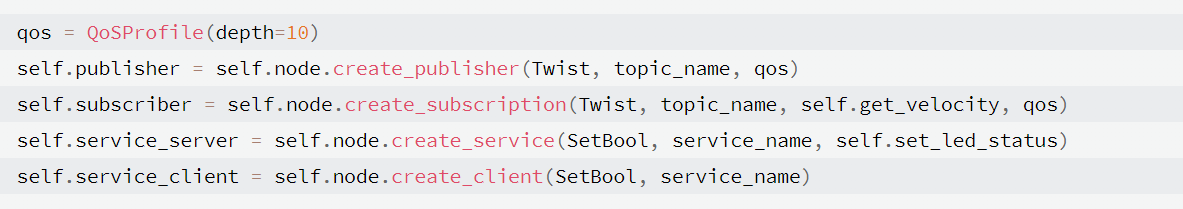

다음 코드는 특정 콜백 함수를 정기적으로 실행시킬 timer류의 선언으로 publish_timer는 주기적으로 w, a, s, d, x, space bar 키 또는 각 푸시 버튼에 의해 변경된 속도 값을 퍼블리시하는 send_velocity 함수를 콜백함수로 호출하도록 설정하였으며, update_timer는 서브스크라이브한 속도값을 처리하는 함수인 update_indicators를 콜백 함수로 호출하도록 하였다. 참고로 여기서는 각 타이머의 주기로 publish_timer는 100 msec로, update_timer는 30 msec으로 설정하였다.

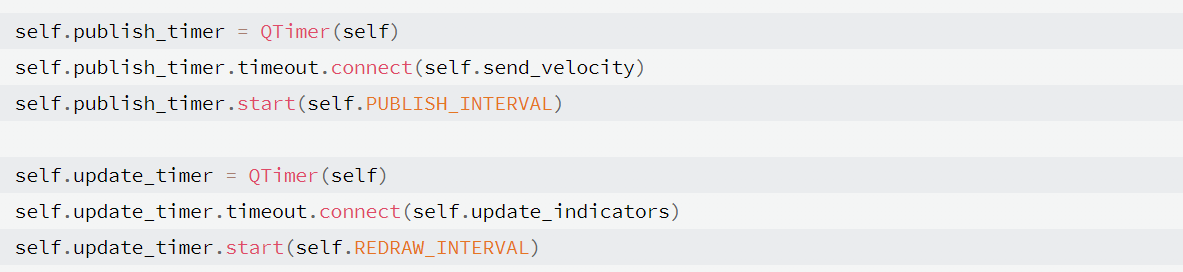

ublish_timer의 콜백함수로 지정된 send_velocity 함수는 다음과 같이 geometry_msgs 패키지의 Twist 인터페이스를 사용하고 있으며 지정된 병진 속도와 회전 속도를 각각 linear.x와 angular.z으로 지정하여 publish 함수로 퍼블리시하는 역할을 한다. 위에서 publish_timer는 100 msec으로 설정하였기에 이 토픽의 퍼블리시 주기는 0.1 sec 가 된다.

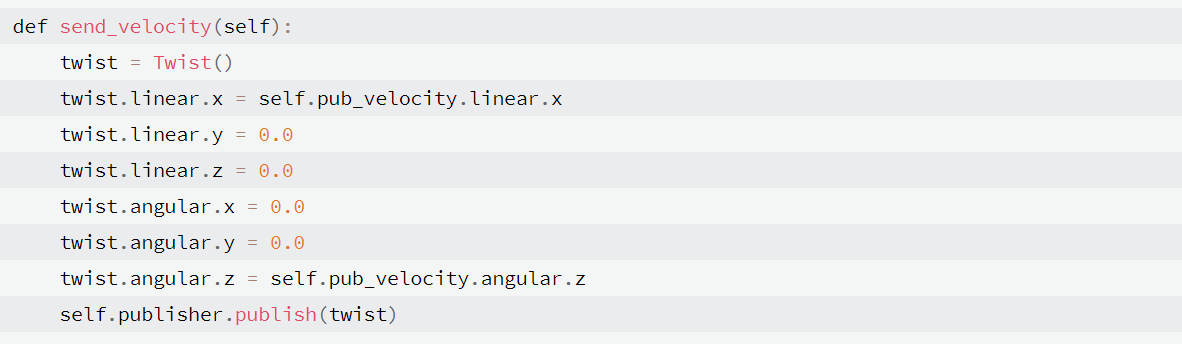

update_timer의 콜백함수로 지정된 update_indicators 함수는 다음과 같이 slider 형태, dial 형태, lcd number 형태의 위젯으로 구성되어 있으며 각 위젯의 값으로는 서브스크라이브한 병진 속도와 회전 속도를 사용하고 있다. 이 함수로 토픽 값을 GUI 형태로 볼 수 있게 된다.

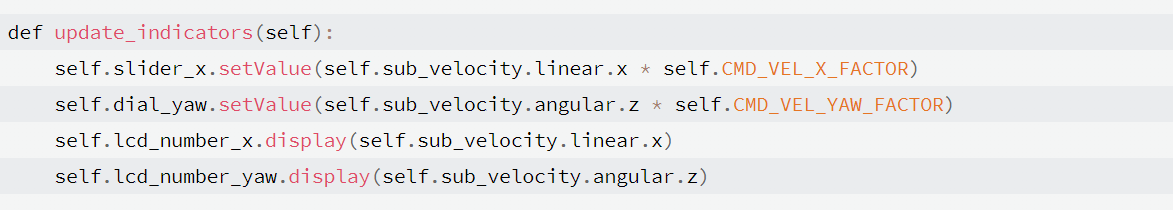

위 update_indicators 함수에서 사용된 병진 속도와 회전 속도는 하기와 같이 토픽 서브스크라이버의 서브스크라이브 콜백 함수로 선언된 하기 get_velocity 함수가 토픽을 수신할 때 마다 업데이트된다. 참고로 여기서 사용된 인터페이스는 토픽 퍼블리셔와 마찬가지로 Twist 인터페이스이다.

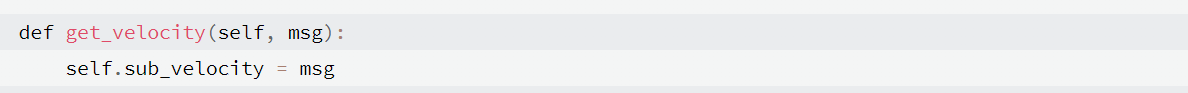

다음 코드는 push button 으로 지정된 w, x, a, d, s 버튼을 눌렀을 때 호출되는 함수들 지정하는 것과 마우스로 버튼을 클릭하지 않고 키보드의 w, x, a, d, s, spacebar 자판을 눌렀을 때 버튼을 누른 것과 동일 효과를 주기위한 숏컷 설정 한 구문이다.

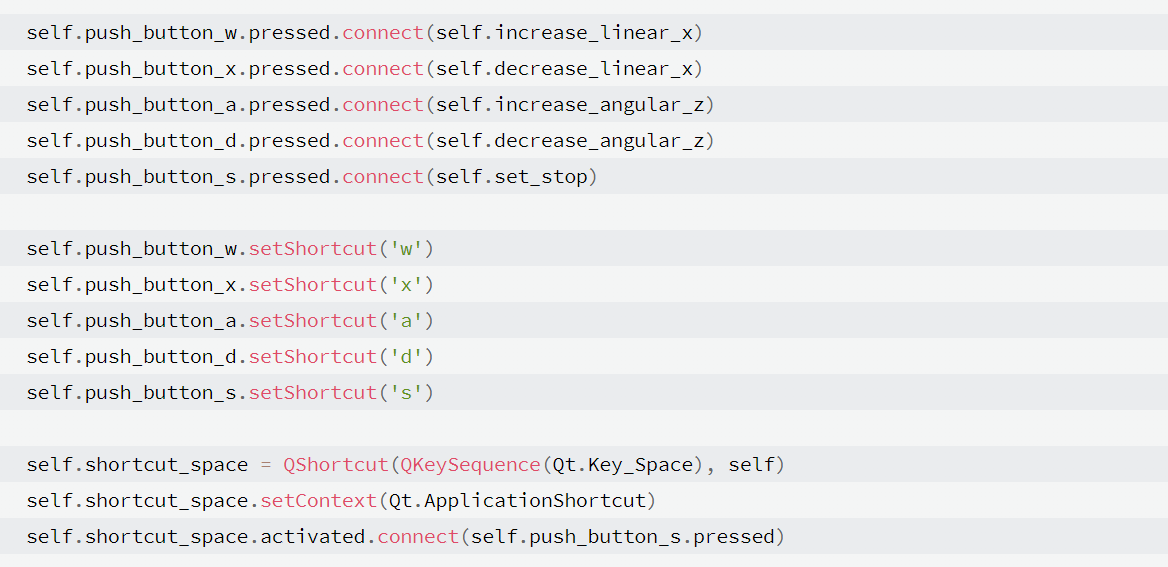

각 push button을 눌렀을 때 실행되는 함수는 아래와 같으며 현재의 병진 속도와 회전 속도를 변화하게 된다. 사용된 단위는 SI 단위로 병진 속도에 m/sec, 회전 속도에 rad/sec 이다.

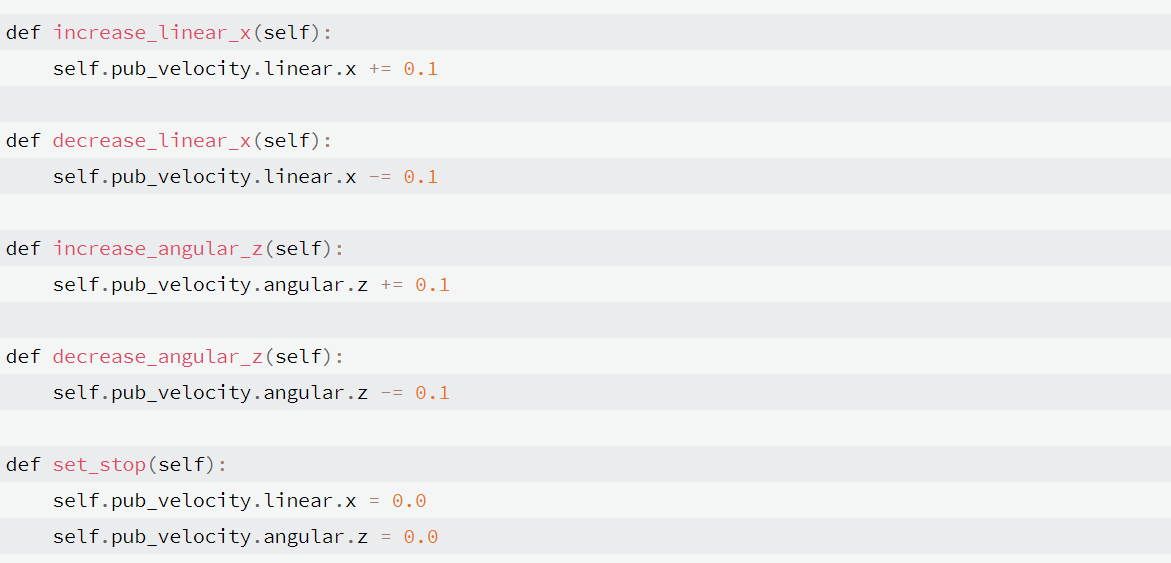

다음 코드는 radio button으로 지정된 'LED ON', 'LED OFF' 버튼을 눌렀을 때 call_led_service 라는 서비스 클라이언트의 서비스 요청 함수를 지정한 구문과 push button과 비슷하게 'LED ON'은 키보드의 o 자판, 'LED OFF'는 f 자판을 숏컷 설정하였다.

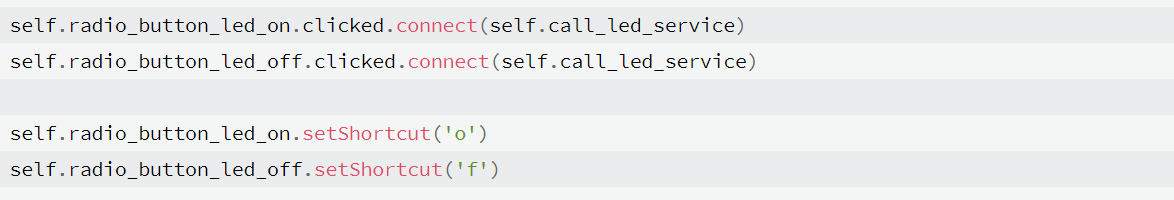

다음 코드는 radio button을 눌렀을 때 실행되는 call_led_service 함수로 'LED ON', 'LED OFF' 라디오 버튼의 클릭 상태를 보고 요청값으로 True 또는 False로 지정하여 서비스 요청을 하는 함수로 구현하였다.

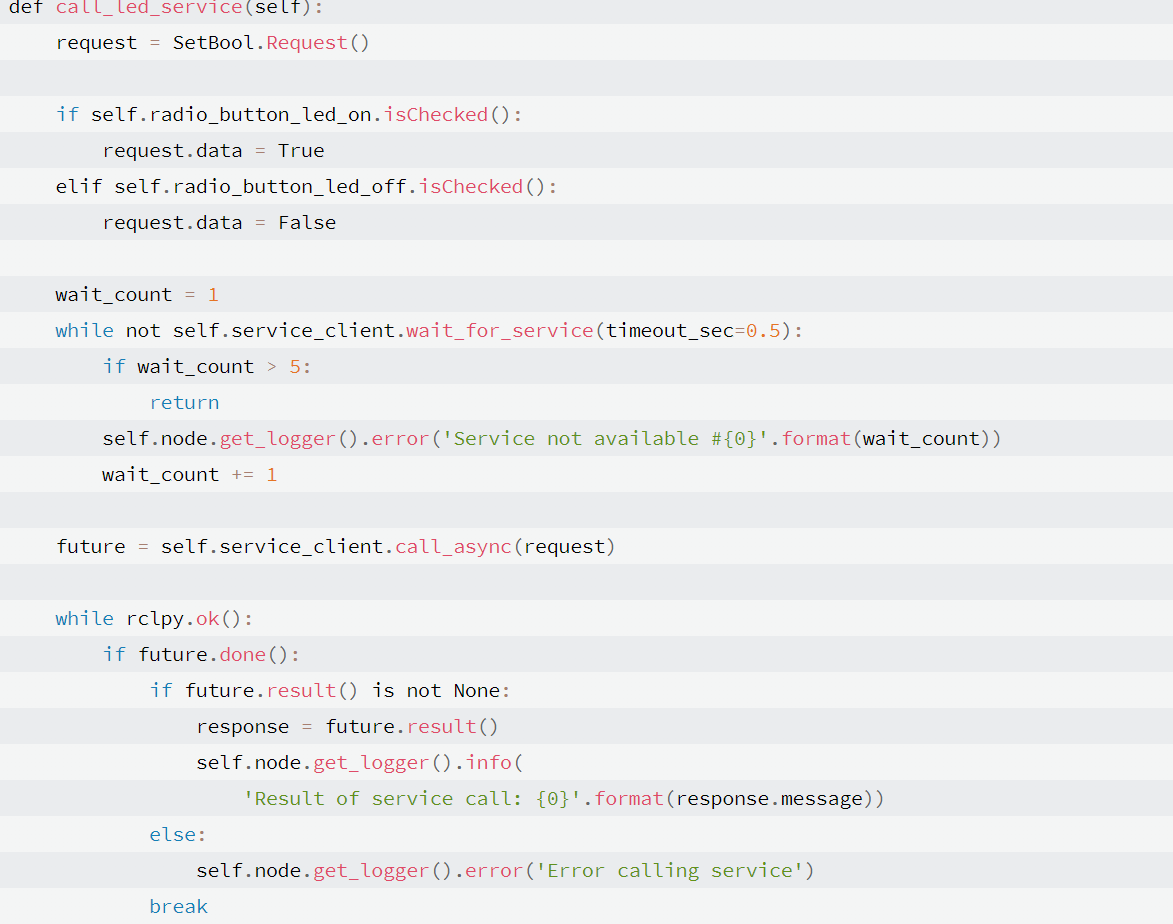

다음 코드는 서비스 클라이언트의 선언시 지정한 서비스 콜백함수로 서비스 클라이언트로부터 서비스 요청값을 받아 특정 처리를 하고 서비스 응답값을 리턴하는 서비스 서버의 서비스 처리 함수이다. request.data로 받은 서비스 요청값이 True이면 push_button_led_status 버튼의 글자 값을 'ON'으로 변경하며 글자 색 또한 주황색으로 변경한다. 만약 False이면 글자 값은 'OFF'로 변경하고 글자 색은 원래의 검정색으로 변경한다. 그리고 문제 없이 push_button_led_status의 글자 값과 색상을 변경하였다면 그 결과 값을 success와 message 값에 담아 서비스 클라이언트에게 리턴한다. 참고로 여기서 사용되는 서비스 인터페이스는 SetBool 이다.

image.png

마지막으로 shutdown_widget 함수이다. 이는 examples.py의 shutdown_plugin 함수가 호출하는 것으로 rqt_example 노드를 실행한 터미널창에서 ctrl + c (SIGINT) 신호를 주었던지 UI 화면에서 'x'버튼을 눌러 종료하였을 때 호출되는 함수이다.  이 함수에서는 위에서 지정하였던 타이머류 및 토픽 퍼블리셔, 토픽 서브스크라이버, 서비스 서버, 서비스 클라이언트를 정리하여 리소스를 해제하게 된다.

image.png

# RQt 플러그인 예제 실행

이번 강좌에서 다룬 예제는 하기 리포지토리에 위치해있으며 하기 명령어와 같이 git clone 명령어로 ROS 2 워크스페이스에 다운로드 하자. 그 뒤 colcon build 명령어로 빌드하여 사용할 수 있다.

rqt_example

In [ ]:
cs
git clone https://github.com/robotpilot/ros2-seminar-examples.git
cw
cbp rqt_example

빌드한 rqt_example 패키지의 rqt_example 노드를 실행하면 우리가 작성한 RQt 플러그인이 실행된다.

In [ ]:
ros2 run rqt_example rqt_example

* 참고로 위 예제나 새롭게 작성한 신규 RQt 플러그인을 실행할 때 ' qt_gui_main() found no plugin matching "xxxx" ' 등의 에러로 인해 실행이 되지 않는 경우가 있다면 ' rqt --force-discover ' 명령어를 이용하여 플러그인 찾기를 강제로 수행해주거나 ' rm ~/.config/ros.org/rqt_gui.ini ' 명령어로 설정 파일을 삭제하면 된다.

위와 같이 ros2 run 명령어로 해당 RQt 플러그인을 실행할 수도 있지만 이는 단독 실행이고 아래 그림과 같이 터미널 창에서 rqt만 실행 시킨 후에 상단의 메뉴에서 Plugins > Visualization > Viewer을 선택하게 되면 rqt에 도킹되는 형태로 사용할 수도 있다. 이 상태에서 메뉴에서 다른 플러그인도 불러와 함께 사용할 수 있다.

In [ ]:
rqt

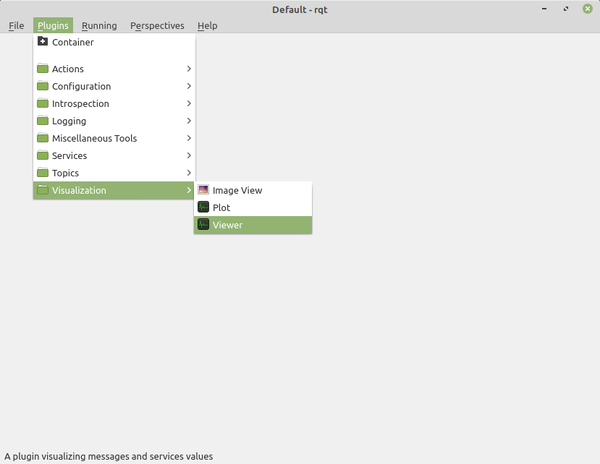

자~ 그러면 아래 그림과 같이 좌측 상단의 w, x, a, d, s 버튼들을 누르거나 각 버튼에 숏컷으로 설정된 키보드 자판을 눌러서 병진 속도와 회전 속도를 변경 시켜보자. 그러면 우측 상단의 슬라이스, 다이얼, LCD 숫자 등이 변경한 속도대로 표시되는 것을 확인할 수 있다. 이 부분이 토픽 퍼블리셔와 토픽 서브스크라이버와 연동된 RQt UI이다.

그 다음으로는 좌측 하단의 'LED ON', 'LED OFF' 라디오 버튼이나 숏컷으로 설정한 o, f 키보드 자판을 누르면 우측 하단의 버튼이 변경되는 것을 확인할 수 있다. 이 부분은 서비스 클라이언트와 서비스 서버와 연동된 RQt UI이다.

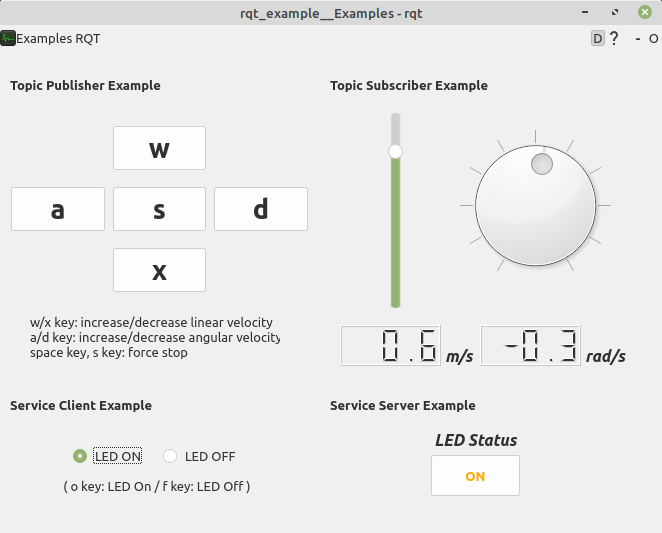

그리고 아래와 같이 rqt2cli 명령어 등을 혼합하여 사용하여 각 토픽 값이나 서비스 요청도 할 수 있으니 참고하도록 하자.

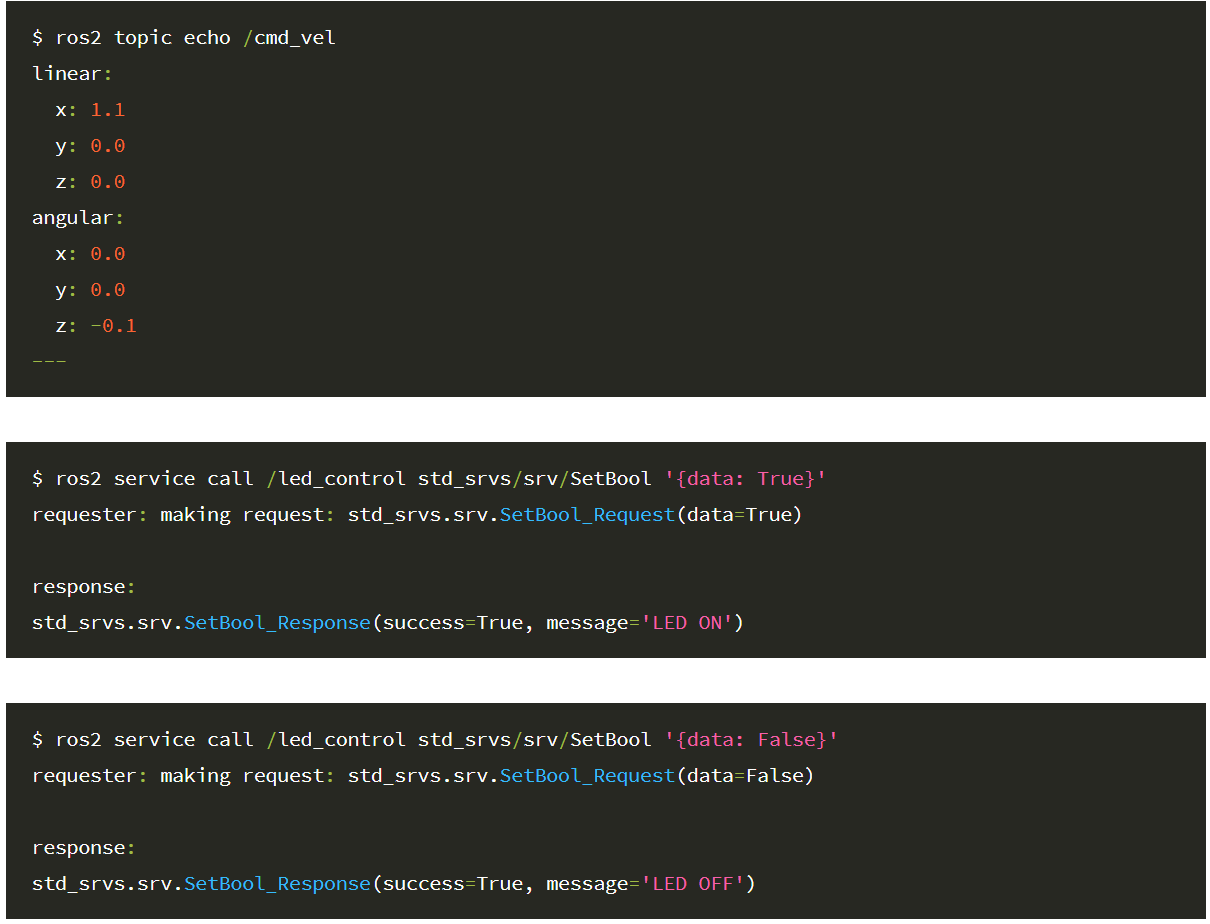

# 다른 노드와 RQt 플러그인 연동 예제 실행

위의 예제 실행과 같이 단독으로 사용할 수도 있지만 RQt 플러그인은 하나의 독립적인 노드이기에 다른 노드와 연동하여 사용할 수 있다. 이를 실험삼아 테스트하기 위해 우리는 rqt_example 노드와 turtlesim_node 노드를 실행시켜볼 것이다. 다음의 명령어로 rqt_example 노드와 turtlesim_node 노드를 실행시켜 보자.

위 강좌 내용에서 'turtlesim.launch.py' 런치 파일을 설명하였던 것처럼 rqt_example의 토픽 이름을 /cmd_vel에서 namespace를 사용하여 /turtle1/cmd_vel 으로 변경해두었기에 rqt_example의 병진 속도와 회전 속도 메시지는 turtlesim_node 노드의 거북이를 바로 제어할 수 있는 상태이다. 위의 예제 실행때 처럼 rqt_example의 w, x, a, d, s 버튼을 눌러 turtlesim_node 노드의 거북이를 제어해보자. 그러면 그림 [7]와 같이 동작하는 것을 확인할 수 있을 것이다.

In [ ]:
ros2 launch rqt_example turtlesim.launch.py

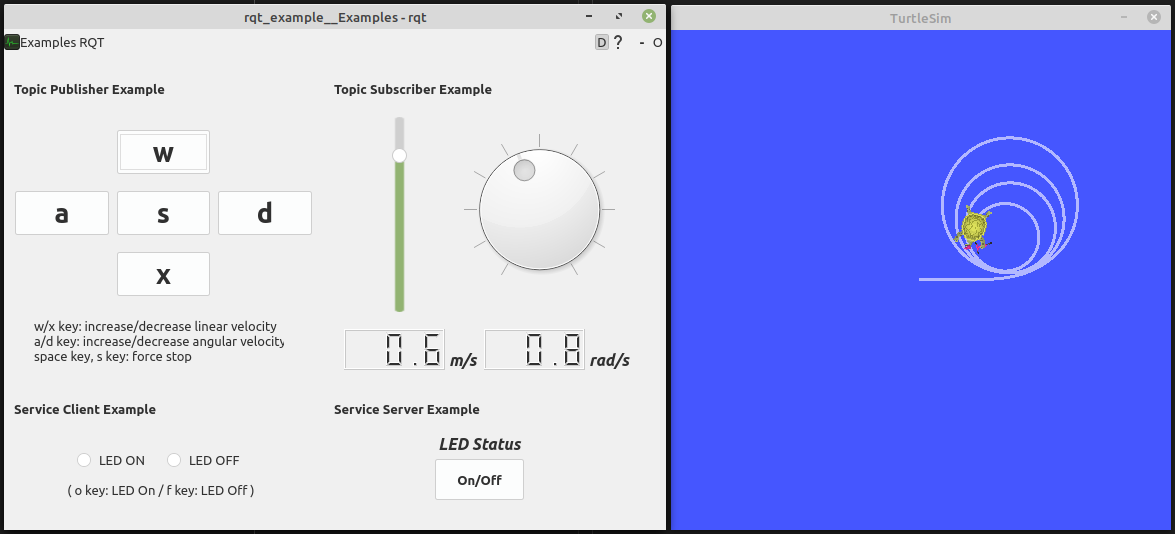

이상으로 ROS 2용 GUI 툴인 RQt 플러그인을 신규로 작성해보고 각 환경 설정 파일, UI 파일, 소스 코드 분석도 해보았다. 이 강의에서 다룬 내용이 ROS 2 GUI 개발의 모든 것은 아니겠지만 이를 기반으로 각자 자신의 프로젝트에 적합한 RQt 플러그인을 제작해보기를 추천해본다. 그리고 ros-visualization 리포지토리는 꼭 한번 훑어 보기를 추천한다. 이 리포지토리들에서는 RQt 플러그인을 담아두고 있는데 plot, graph, image viewer, interface 류의 사용 등 다양한 툴과 관련된 코드가 있어서 RQt 플러그인 제작할 때 훌륭한 참고 자료가 될 것이다.